In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [6]:
# Set the parameters
max_features = 10000  # Maximum number of words to keep in the vocabulary
maxlen = 500  # Maximum length of a sequence
batch_size = 32

In [7]:
# Load the IMDB dataset (binary sentiment classification)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



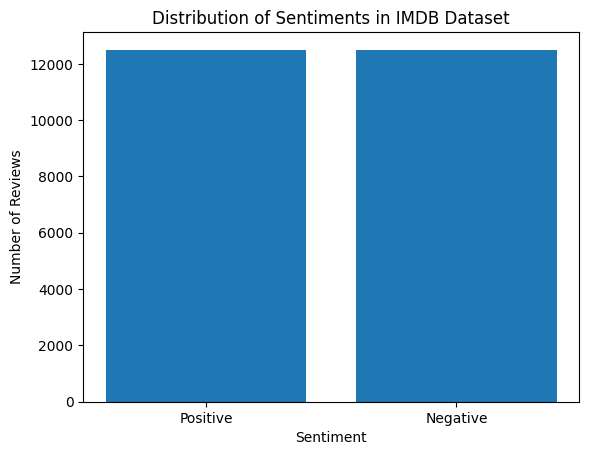

In [8]:
import matplotlib.pyplot as plt

# Visualize the distribution of sentiments in the dataset
positive_reviews = sum(y_train)
negative_reviews = len(y_train) - positive_reviews

plt.bar(['Positive', 'Negative'], [positive_reviews, negative_reviews])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments in IMDB Dataset')
plt.show()


In [9]:
# Preprocess the data
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)



In [10]:
# Build the model
model = Sequential()
model.add(Embedding(max_features, 32))  # Word embeddings
model.add(GRU(32))  # GRU layer
model.add(Dense(1, activation='sigmoid'))  # Output layer



In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [12]:
# Train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))



Epoch 1/5
782/782 [==============================] - 227s 287ms/step - loss: 0.4289 - accuracy: 0.7942 - val_loss: 0.3207 - val_accuracy: 0.8660
Epoch 2/5
782/782 [==============================] - 221s 283ms/step - loss: 0.2451 - accuracy: 0.9048 - val_loss: 0.3104 - val_accuracy: 0.8736
Epoch 3/5
782/782 [==============================] - 223s 285ms/step - loss: 0.1921 - accuracy: 0.9280 - val_loss: 0.3229 - val_accuracy: 0.8682
Epoch 4/5
782/782 [==============================] - 221s 283ms/step - loss: 0.1501 - accuracy: 0.9463 - val_loss: 0.3454 - val_accuracy: 0.8680
Epoch 5/5
782/782 [==============================] - 222s 284ms/step - loss: 0.1105 - accuracy: 0.9612 - val_loss: 0.4201 - val_accuracy: 0.8684


In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

782/782 [==============================] - 34s 43ms/step - loss: 0.4201 - accuracy: 0.8684
Test loss: 0.42010968923568726
Test accuracy: 0.8683599829673767


782/782 [==============================] - 35s 43ms/step


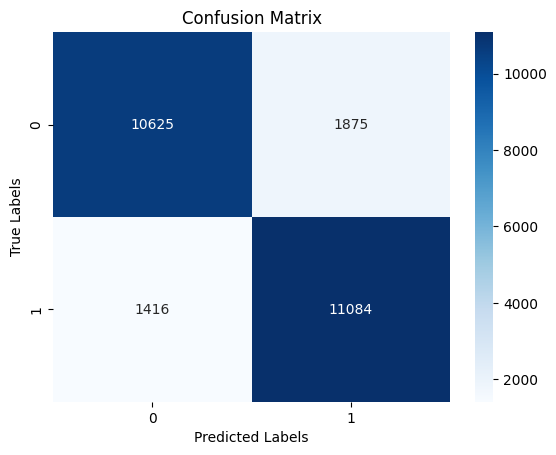

In [16]:
# Predict sentiment probabilities for the test set
y_pred_prob = model.predict(x_test)

# Convert the predicted probabilities to binary labels
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
